# Linear Time invariant systems

C:\Users\ANUSHKA.K\AppData\Local\Temp\ipykernel_1540\3623196564.py:28: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  y[n] = integrate.simps(product(t), t) # Actual convolution at time t


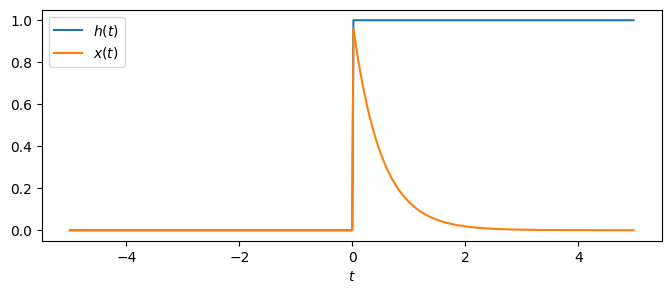

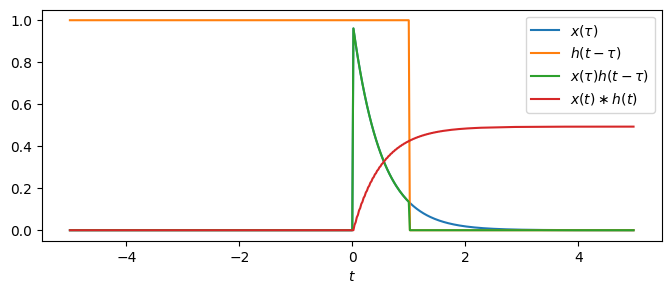

In [137]:
import scipy as sp
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
h = lambda t: (t > 0)*1.0
x = lambda t: (t > 0) * np.exp(-2*t) # a = −2
Fs = 50 # Sampling frequency for the plotting
T = 5 # Time range
t = np.arange(-T, T, 1/Fs) # Time samples
plt.figure(figsize=(8,3))
plt.plot(t, h(t), label='$h(t)$')
plt.plot(t, x(t), label='$x(t)$')
plt.xlabel(r'$t$')
plt.legend()
# Plotting
t_ = 1 # For illustration, choose some value for T

flipped = lambda tau: h(t_ - tau)
product = lambda tau: x(tau)*h(t_ - tau)
plt.figure(figsize=(8,3))
plt.plot(t, x(t), label=r'$x(\tau)$')
plt.plot(t, flipped(t), label=r'$h(t − \tau)$')
plt.plot(t, product(t), label=r'$x(\tau)h(t −\tau)$')
# Computing the convolution using integration
y = np.zeros(len(t))
for n, t_ in enumerate(t):
    product = lambda tau: x(tau) * h(t_ - tau)
    y[n] = integrate.simps(product(t), t) # Actual convolution at time t
    
plt.plot(t, y, label=r'$x(t)\ast h(t)$') # Plotting the output y
plt.xlabel(r'$t$')
plt.legend()

In [138]:
fs = 1000 # Sampling frequency for the plotting
delta = lambda t: np.array([fs/10 if 0 < t_ and t_ < 1/(fs/10) else 0.0 for t_ in t])
t = np.arange(-5, 5, 1/fs) # Time samples

delta_int= integrate.simpson(y=delta(t), x=t) # Actual convolution at time t

print(delta_int)

1.000000000000334


In [139]:
h_new = lambda t: delta(t+2) + delta(t-1)

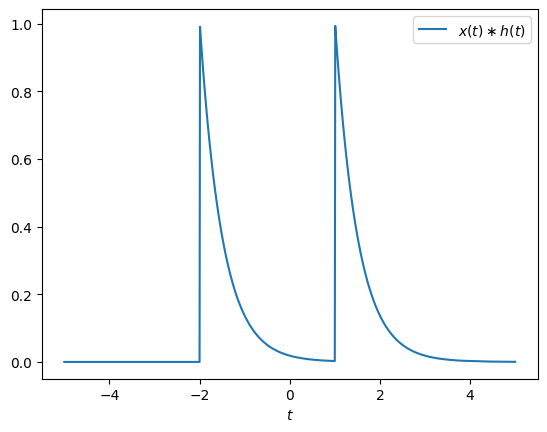

In [140]:
y1 = np.zeros(len(t))
for n, t_ in enumerate(t):
    product = lambda tau: x(tau) * h_new(t_ - tau)
    y1[n]= integrate.simpson(y= product(t), x = t) # Actual convolution at time t

plt.plot(t, y1, label=r'$x(t)\ast h(t)$') # Plotting the output y
plt.xlabel(r'$t$')
plt.legend()

y[0] = x[0:1]*h[6:7] = 0.0
y[1] = x[0:2]*h[5:7] = 0.0
y[2] = x[0:3]*h[4:7] = 0.0
y[3] = x[0:4]*h[3:7] = 0.0
y[4] = x[0:5]*h[2:7] = 3.0
y[5] = x[0:5]*h[1:6] = 4.0
y[6] = x[0:5]*h[0:5] = 7.0
y[7] = x[1:5]*h[0:4] = 2.0
y[8] = x[2:5]*h[0:3] = 0.0
y[9] = x[3:5]*h[0:2] = 0.0
y[10] = x[4:5]*h[0:1] = 0.0


<StemContainer object of 3 artists>

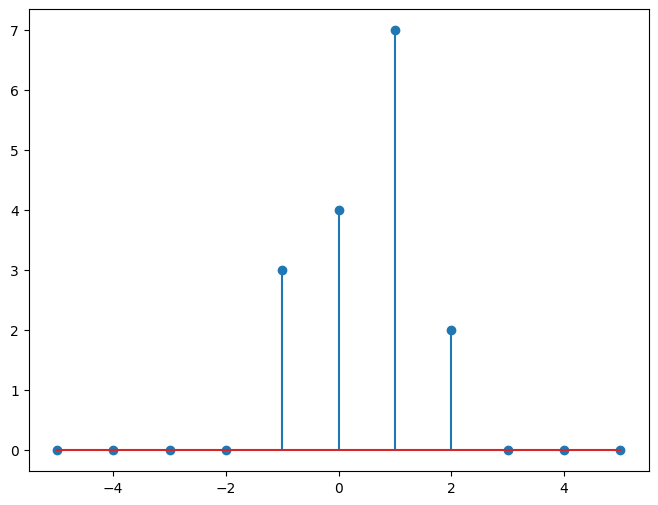

In [141]:
x = np.array([0, 1, 1, 2, 0])
h = np.array([0, 0, 0, 3, 1, 0, 0])
hr = np.flip(h)

y = np.zeros(len(x) + len(h) - 1)
n_ = np.arange(-5, 6, 1)
for n in range(len(y)):
    xkmin = max(0, n - len(h) + 1)
    xkmax = min(len(x), n + 1)
    hkmin = max(0, len(h) - n -1)
    hkmax = min(len(h), len(x) + len(h) -n -1)
    y[n] = np.sum(x[xkmin:xkmax]*hr[hkmin:hkmax])
    print("y[{0}] = x[{1}:{2}]*h[{3}:{4}] = {5}".format(n, xkmin, xkmax, hkmin, hkmax, y[n]))

fig, ax = plt.subplots(figsize=(8, 6))
ax.stem(n_, y, label=r'$y[n]$')

In [142]:
x = np.array([0,0,0,1,1,2,0,0,0])
h = np.array([0,0,0,0,1,2,0,0,0])
hr = np.flip(h)
xo = 5
ho = 5

y = np.zeros(len(x) + len(h) - 1)
n_ = np.arange(len(y))
for n in n_:
    xkmin = max(0, n - len(h) + 1)
    xkmax = min(len(x), n + 1)
    hkmin = max(0, len(h) - n -1)
    hkmax = min(len(h), len(x) + len(h) -n -1)
    y[n] = np.sum(x[xkmin:xkmax]*hr[hkmin:hkmax])
    print("y[{0}] = x[{1}:{2}]*h[{3}:{4}] = {5}".format(n, xkmin, xkmax, hkmin, hkmax, y[n]))


y[0] = x[0:1]*h[8:9] = 0.0
y[1] = x[0:2]*h[7:9] = 0.0
y[2] = x[0:3]*h[6:9] = 0.0
y[3] = x[0:4]*h[5:9] = 0.0
y[4] = x[0:5]*h[4:9] = 0.0
y[5] = x[0:6]*h[3:9] = 0.0
y[6] = x[0:7]*h[2:9] = 0.0
y[7] = x[0:8]*h[1:9] = 1.0
y[8] = x[0:9]*h[0:9] = 3.0
y[9] = x[1:9]*h[0:8] = 4.0
y[10] = x[2:9]*h[0:7] = 4.0
y[11] = x[3:9]*h[0:6] = 0.0
y[12] = x[4:9]*h[0:5] = 0.0
y[13] = x[5:9]*h[0:4] = 0.0
y[14] = x[6:9]*h[0:3] = 0.0
y[15] = x[7:9]*h[0:2] = 0.0
y[16] = x[8:9]*h[0:1] = 0.0


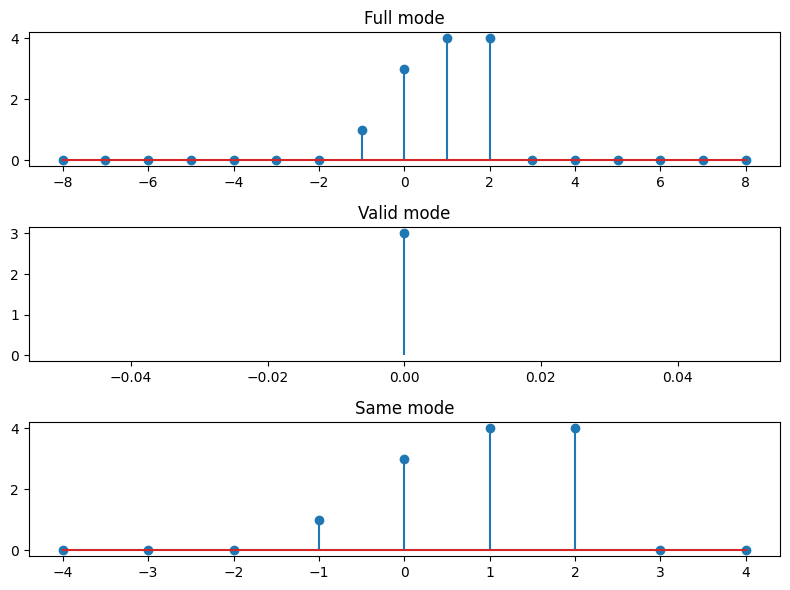

In [145]:
n_ = np.arange(-8, 9, 1)

yfull = np.zeros(len(x) + len(h) - 1)
yvalid = np.zeros(len(x) + len(h) - 1)
ysame = np.zeros(len(x) + len(h) - 1)

yfull=sp.signal.convolve(x, h, mode='full')
yvalid=sp.signal.convolve(x, h, mode='valid')
ysame=sp.signal.convolve(x, h, mode='same')

fig, ax = plt.subplots(3,1, figsize=(8, 6))
ax[0].stem(n_, yfull, label=r'$full mode $')
ax[0].set_title('Full mode')

ax[1].stem(yvalid, label=r'$ valid mode $')
ax[1].set_title("Valid mode")

n_ = np.arange(-4, 5, 1)
ax[2].stem(n_, ysame, label=r'$ same mode $')
ax[2].set_title('Same mode')

plt.tight_layout()


full mode: gives the full array of outputs after convaluting the 2 given arrays

view mode: gives the value of which when the arrays overlay with each other 

same mode: gives the convaluted array limited to the length of the input arrays 

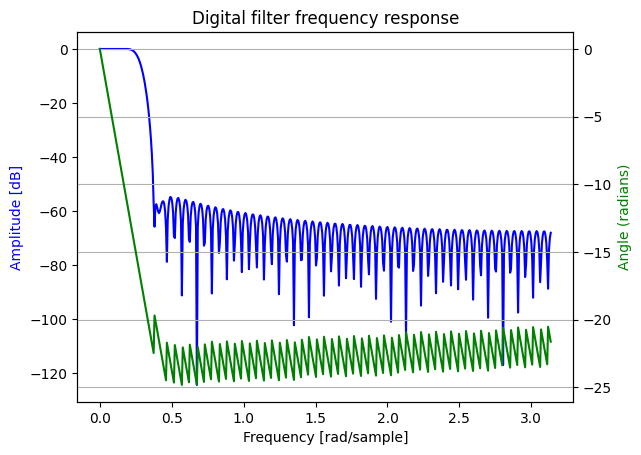

In [153]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

data, samplerate = sf.read('anthem.wav')
nyquist = samplerate//2
fc = 2000/nyquist
n = 121
b = signal.firwin(n, fc, pass_zero=True)
w, h = signal.freqz(b)


fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))

ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

ch1 = signal.convolve(data[:,0], b, mode='same')
ch2 = signal.convolve(data[:,1], b, mode='same')


sf.write('audio_file_filtered.wav', np.vstack((ch1, ch2)).T + data, samplerate)



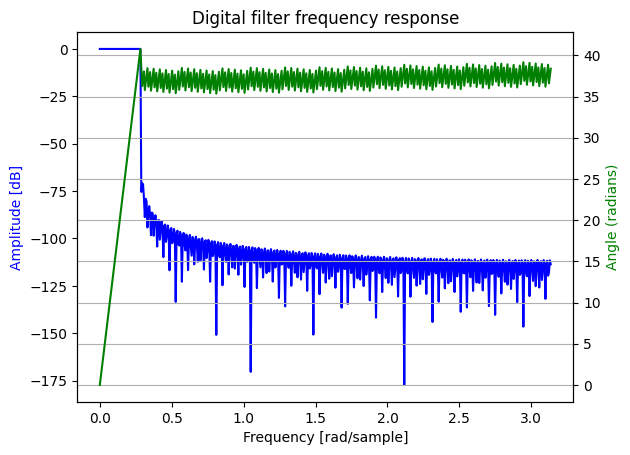

In [156]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

data, samplerate = sf.read('anthem.wav')
nyquist = samplerate//2
fc = 2000/nyquist
n = 12000
b = signal.firwin(n, fc, pass_zero=True)
w, h = signal.freqz(b)


fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))

ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

ch1 = signal.convolve(data[:,0], b, mode='same')
ch2 = signal.convolve(data[:,1], b, mode='same')


sf.write('new_audio.wav', np.vstack((ch1, ch2)).T + data, samplerate)



[[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 7 8 9 0]
 [0 0 0 0 0]]


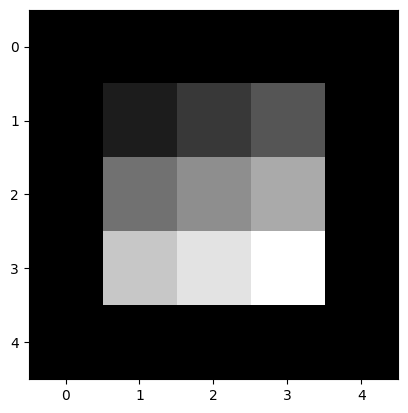

In [162]:
x = np.array([[0, 0, 0, 0, 0] ,[0, 0, 0, 0, 0 ], [0, 0, 1, 0, 0], [0, 0, 0, 0, 0] , [0, 0, 0, 0, 0]] )

f_kernel = np.array([[1, 2, 3 ], [4, 5, 6], [7, 8, 9]])

y_conv = signal.convolve2d(x, f_kernel, mode='same')

print(y_conv)
plt.imshow(y_conv, cmap='gray')

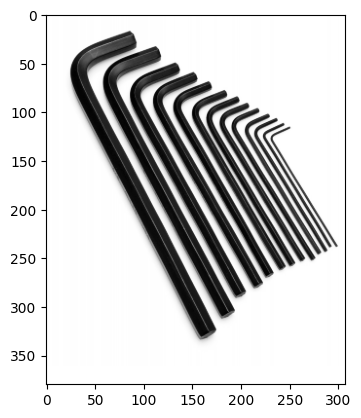

In [172]:
with open ('image.png', 'rb') as f:
    img = plt.imread(f)

height, width = img.shape[:2]
new_img = np.zeros((height, width))

for i in range(height):
    for j in range(width):
        new_img[i, j] = np.mean(img[i, j, :])

plt.imshow(new_img, cmap='Greys_r')
plt.show()